<a href="https://colab.research.google.com/github/NaiaraSPinto/useful_ee_scripts/blob/main/Entrenamiento_HyDRAFLOODS_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flood mapping using HYDRAFloods / Mapeo de inundaciones usando HYDRAFloods

In this notebook we will see a greater use of HYDRAFloods for creating flood maps. We will focus on the use of Sentinel 1 SAR data to create flood maps for a use case of events in Peru, Ecuador and Peru. While we focus on SAR for this exercise, the concepts extend to optical data.

HYDRAFloods Python package can be found at: https://servir-mekong.github.io/hydra-floods/


En este cuaderno veremos un mayor uso de HYDRAFloods para crear mapas de inundación. Nos centraremos en el uso de los datos SAR de Sentinel 1 para crear mapas de inundaciones para eventos ocurridos en Peru, Ecuador y Brasil. Si bien nos enfocamos en SAR para este ejercicio, los conceptos se extienden a los datos ópticos.

El paquete Python de HYDRAFloods se puede encontrar en: https://servir-mekong.github.io/hydra-floods/

## Setup

Before running the notebook, mount your Google Drive in the notebook. We will use Google Drive to securely store the Earth Engine credentials to be used in other notebooks. This will allow us to avoid authentication every time, saving time throughout the training.

Antes de ejecutar el cuaderno, monte su Google Drive en el cuaderno. Utilizaremos Google Drive para almacenar de forma segura las credenciales de Earth Engine para utilizarlas en otros cuadernos. Esto nos permitirá evitar la autenticación cada vez, ahorrando tiempo a lo largo del entrenamiento.

In [1]:
# mount the google drive so that we can save credentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now we will install the `hydrafloods` package for surface water mapping and `geemap` for interactive viewing results from Earth Engine.




Ahora instalaremos el paquete `hydrafloods` para el mapeo de aguas superficiales y `geemap` para la visualización interactiva de los resultados desde Earth Engine.



In [2]:
# install the packages needed
!pip install hydrafloods geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=1c676363063ed27aab643771946064acef97195324804d47a24c5ba9c2787380
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
  Created wheel for pipetools: filename=pipetools-1.1.0-py3-none-any.whl size=13602 sha256=1cf2cee82b5a22ad6e0eb03eb9cb141f94bf1c7baff8189f8fda28107cbf1923
  Stored in directory: /root/.cache/pip/wheels/3e/66/b3/357ae471d72e8b2fabf98f8395730c146e15c2be70c4c8c36

In [3]:
import ee
import datetime
import hydrafloods as hf
import geemap.foliumap as geemap
import geemap.colormaps as cm

In [ ]:
ee.Authenticate()
ee.Initialize()

## Recap of mapping surface water / Recapitulación mapas de aguas superficiales.

The start of any process is to acquire data. Here, HYDRAFloods is used to connect to Earth Engine collections and apply spatial-temporal filters of our interest with a minimum amount of coding.

El comienzo de cualquier proceso es adquirir datos. Aquí se utiliza HYDRAFloods para conectarse a las colecciones de Earth Engine y aplicar filtros espacio-temporales de nuestro interés con una cantidad mínima de codificación

#NEWS / Noticias

##Ecuador
Las intensas lluvias y el desbordamiento de ríos dejaron grandes extensiones de terrenos agrícolas y poblados afectados. El domingo 20 de marzo de 2022 otro de los cantones que sufrió por el nivel de agua fue Puebloviejo, en donde 30 viviendas resultaron inundadas.
https://www.elcomercio.com/actualidad/ecuador/imagen-inundaciones-danos-rios-lluvias.html


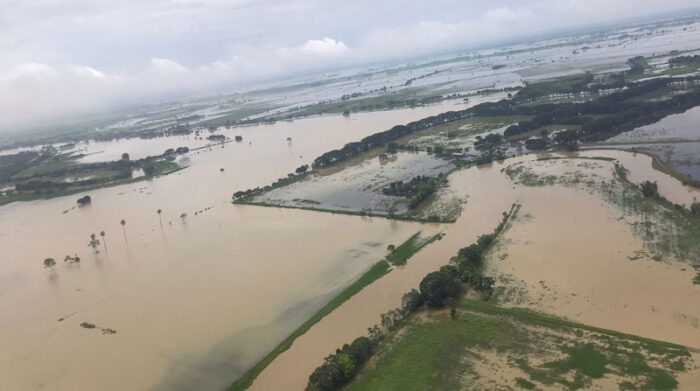

##Peru

A las de las 7 de la mañana del 27 de Marzo (2017) la región de Piura, ubicada al norte del Perú, amaneció inundada. El río del mismo nombre excedió el límite de los 2500 metros por segundo y se desbordó. De acuerdo a información del Servicio Nacional de Meteorología e Hidrología del Perú (Senamhi), el río Piura ha alcanzado ya los 3100 metros por segundo.
https://es.mongabay.com/2017/03/peru-rios-inundacion-nino-costero-piura/

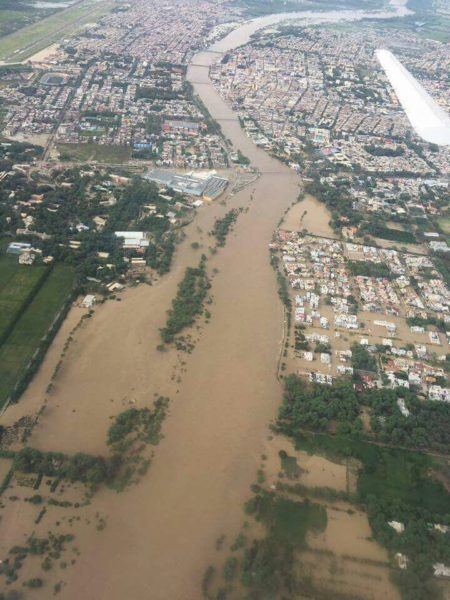

##Brasil
SAOPAULO, 1 dic 2022– Las fuertes lluvias causaron graves inundaciones en el sur de Brasil el jueves, donde los rescatistas del estado sureño de Santa Catarina fueron enviados para ayudar a evacuar a cientos de familias atrapadas en sus casas. Las inundaciones en esta época del año en Brasil son habituales y han causado estragos durante décadas.
https://es.euronews.com/2022/12/01/brasil-clima


##Colombia

En Puerto Wilches, Santander, autoridades están a la espera de que el nivel del río Magdalena permita transportar en ferri la maquinaria necesaria para reparar los nuevos daños del dique de esta zona, donde, debido a su ruptura, fueron arrasadas por el agua más de 10 hectáreas de cultivos y decenas de animales. En el área urbana se encuentran inundadas 60 viviendas.

https://noticias.caracoltv.com/colombia/mas-de-mil-hectareas-fueron-arrasadas-en-puerto-wilches-santander-por-ruptura-de-dique-rg10

In [ ]:
#region = hf.country_bbox("Peru")
#region = ee.Geometry.Rectangle([-80.7994, -5.034813, -80.486130, -5.560888])#Peru

#region = hf.country_bbox("Ecuador")
#region = ee.Geometry.Rectangle([-79.8475, -0.482, -79.0579, -2.1499])#Ecuador

#region = hf.country_bbox("Brasil")
region = ee.Geometry.Rectangle([-49.54294, -20.04966, -40.9935995, -25.51880])#Brasil

#region = hf.country_bbox("Colombia")
#region = ee.Geometry.Rectangle([-74.06, 8.182, -73.441, 7.147])#Colombia


In [ ]:
#s1 = hf.Sentinel1(region,"2017-03-26","2017-04-06")#Peru
s1 = hf.Sentinel1(region,"2022-11-30","2022-12-03")#Brasil
#s1 = hf.Sentinel1(region,"2022-03-18","2022-03-24")#Ecuador
#s1 = hf.Sentinel1(region,"2022-10-01","2022-11-30")#Colombia

In [ ]:
# print how many images we have for our specified time and location
# numero de imagenes para el periodo de tiempo dentro de la region de interes
s1.n_images

2

In [ ]:
# get the imagery acquisition times
# fechas de adquisicion de las imagenes
s1.dates

['2022-12-02 08:31:17.000', '2022-12-02 08:31:46.000']

#Image preprocessing / Pre procesamiento de imagenes

##Terrrain correction / Corrección Geométrica

This technique will try to compensate for the geometric distortions present in the image due to the SAR acquisition geometry. The algorithm uses a digital elevation model to make such correction.
To make the necessary corrections to the images, we extract the DEM from the MERIT Hydro dataset: Global Hydrographic Datasets, available from GEE.

https://developers.google.com/earth-engine/datasets/catalog/MERIT_Hydro_v1_0_1#bands



Esta técnica tratará de compensar las distorsiones geométricas presentes en la imagen debido a la geometría de adquisición SAR. El Algoritmo utiliza un modelo de elevacion digital para hacer dicha corrección.
Para realizar las respectivas correciones de las imagenes, extraemos el DEM del dataset de MERIT Hydro: Conjuntos de datos hidrográficos globales , disponibles de GEE

https://developers.google.com/earth-engine/datasets/catalog/MERIT_Hydro_v1_0_1#bands

In [ ]:
merit = ee.Image("MERIT/Hydro/v1_0_1")
#mydem = ee.Image("NASA/NASADEM_HGT/001")


# extract out the DEM and HAND bands
# Extraccion de la bandas de elevacion y mano (altura sobre el drenaje más cercano)

dem = merit.select("elv").unmask(0)
hand = merit.select("hnd").unmask(0)

In [ ]:
# apply a (psuedo-) terrain flattening algorithm to S1 data
s1_flat = s1.apply_func(hf.slope_correction, elevation = dem, buffer = 100)

## Speckle filter/filtro de moteado

Correction of stains and speckling. All SAR images have a certain degree of noise called "Speckle". This noise has its origin in the random character of the observed reflectivity, caused by the interference of numerous reflective objects (scatterers) within the same resolution cell. The Speckle noise appears superimposed on the image data as a texture of very bright or very dark pixels in areas that are actually homogeneous, something like a "salt and pepper" effect. In this case, the resulting image should be an equally homogeneous reflectivity image.

Todas las imágenes SAR tienen un cierto grado de lo que se denomina ruido de
"Speckle". Este ruido tiene su origen en el carácter aleatorio de la reflectividad observada, causada por la interferencia de numerosos objetos reflectores (scatterers) dentro de una misma celda de resolución. El ruido de Speckle aparece sobreimpuesto a los datos de la imagen como una textura de píxeles muy brillantes o muy oscuros en zonas que realmente son homogéneas, algo así como un efecto de "granos de sal y pimienta". En este caso, la imagen resultante debería ser una imagen de reflectividad igualmente homogénea.

In [ ]:
# apply a speckle filter algorithm to S1 data
s1_filtered = s1_flat.apply_func(hf.gamma_map)

In [ ]:
# aggregate SAR observations to 30x30 m pixels
s1_aggregated = s1_filtered.apply_func(lambda x: x.focal_mean(40,"circle","meters").reproject(ee.Projection("EPSG:4326").atScale(30)))

In [ ]:
sar_vis = {
    "bands":"VV",
    "min":-25,
    "max":0
}

In [ ]:
#Map = geemap.Map(center=(-5.2, -80.6), zoom=10)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(s1_aggregated.collection.mosaic(),sar_vis, 'Sentinel 1 mosaic')
Map.addLayer(s1_flat.collection.median(),{"bands": "VV", "min":-25, "max": 0}, 'Sentinel 1 (terrain flattened)')
Map.addLayer(s1_aggregated.collection.median(),{"bands": "VV", "min":-25, "max": 0}, 'Sentinel 1 (speckle filtered)')

Map.addLayer(region,{},"Region of Interest")

Map.addLayerControl()
Map

# Classification of water and non-water//Clasificacion agua y no agua

In [ ]:
# apply a water thresholding algorithm to the collection
# method from Markert et al., 2020 (https://doi.org/10.3390/rs12152469)

## aplicar un algoritmo de umbral de agua a la colección
water = s1_filtered.apply_func(hf.edge_otsu,initial_threshold=-16,band="VH",edge_buffer=100,scale=30)

In [ ]:
water_img = water.collection.mosaic()

Open - Close  binary filter

Opening / Apertura.

Es un operador fuerte que crea combinando erosión y dilatación. Al abrir el cuadro, los elementos se separan.
La dilatación aumenta el tamaño de una imagen, mientras que la erosión lo disminuye. Suaviza su contorno, fractura los istmos estrechos y elimina los salientes finos en general.

Closing/cierre.

Al igual que la apertura, tiende a suavizar las zonas de contorno, pero también fusiona pequeñas roturas y largos golfos finos, elimina pequeños agujeros y rellena vacios.

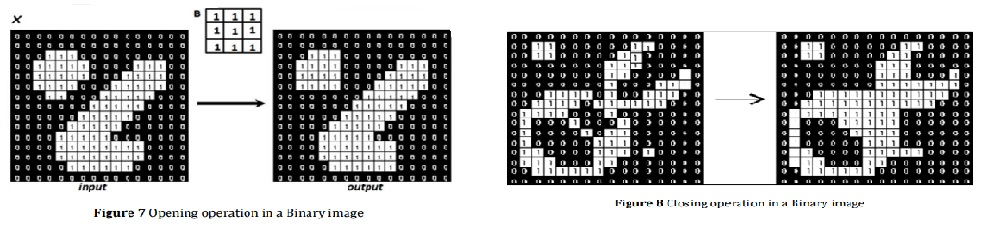

In [ ]:
water_final = (
    hf.close_binary(
        hf.open_binary(water_img,window=1.5) # apply opening filter
        .updateMask(water_img.mask()) # force mask to be consistent with sar imagery
        ,window=1.5
    ) # apply closing filter
    .updateMask(water_img.mask()) # force mask to be consistent with sar imagery
    .And(hand.lt(15)) # only pixels that were originally classified as water AND < 15m from HAND
)

In [ ]:
# view the results of SAR water mapping
#Map = geemap.Map(center=(-5.2, -80.6), zoom=10)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(s1_aggregated.collection.median(),{"bands": "VV", "min":-25, "max": 0}, 'Sentinel 1')
Map.addLayer(water_img.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "Sentinel 1 (water_img)")
Map.addLayer(water_final.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "Sentinel 1 (water_final)")
Map.addLayer(region,{},"Region of Interest")
Map.addLayerControl()
Map

In [ ]:
#@title Export to asset example
hf.export_image(
    s1_aggregated.collection.mosaic().addBands(water_img),
    region,
    description = "hydrafloods_training_water_water_Brasil",
    scale=30,
    crs='EPSG:4326',
    pyramiding={"water":"mode"},
    export_type='toAsset',
    asset_id = "users/cacamachoh/hydrafloods_training_water_Brasil"
)


In [ ]:
hf.export_image(
    water_final,
    region,
    description = "hydrafloods_training_water_Brasil",
    scale=30,
    crs='EPSG:4326',
    pyramiding={".default":"mode"},
    export_type='toDrive'
)


# Extracting floods from permanent water /Extraer inundaciones de aguas permanentes

To extract floods we need some indicator of what is normal. The "normal" usually influence what the resulting flood map looks like. In these following cases we will use the [JRC surface water data](https://doi.org/10.1038/nature20584) to compare the event against and extract the flooded areas.

Para extraer inundaciones necesitamos algún indicador de lo que es normal. Lo "normal" generalmente influye en el aspecto del mapa de inundación resultante. En los siguientes casos, utilizaremos los [datos de agua superficial del JRC](https://doi.org/10.1038/nature20584)para comparar el evento y extraer las áreas inundadas.

In [ ]:
# start by pulling in a pre-computed water layer from earlier
event_img = ee.Image("users/cacamachoh/hydrafloods_training_water_Brasil")
sar_img = event_img.select("V.*")
water_img = event_img.select("water")

## Using yearly permanent water / agua permanente anual

For this case we will use previous 5-years of classified permanent water to compare against.

Para este caso, usaremos 5 años anteriores de agua permanente clasificada para comparar.

In [ ]:
water_img = water_img.set("system:time_start", ee.Date("2022-12-02").millis())

In [ ]:
water_img.date().format("YYYY-MM-dd").getInfo()

'2022-12-02'

In [ ]:
# use `extract_flood` function to use JRC data as reference
floods_yearly = hf.extract_flood(water_img,reference="yearly")

In [ ]:
# view the results of flood mapping
#Map = geemap.Map(center=(-5.2, -80.6), zoom=10)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(water_img.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "Sentinel 1 (water)")
Map.addLayer(floods_yearly.selfMask(),{"min":0,"max":1,"palette":"red"}, "Sentinel 1 (flood)")
Map.addLayer(region,{},"Region of Interest")
Map.addLayerControl()
Map

## Using long-term occurrence/Usando la ocurrencia a largo plazo

Here we use the full record of JRC observed water and define permanent using a % occurrence threshold.

Aquí usamos el registro completo de agua observada por el JRC y definimos permanente usando un % de umbral de ocurrencia.

In [ ]:
# use `extract_flood` function to use JRC data as reference
floods_occurrence = hf.extract_flood(water_img,reference="occurrence",permanent_threshold=5)

In [ ]:
# view the results of flood mapping
#Map = geemap.Map(center=(-5.2, -80.6), zoom=10)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(sar_img,{"bands": "VV", "min":-25, "max": 0}, 'Sentinel 1')
Map.addLayer(water_img.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "Sentinel 1 (water)")
Map.addLayer(floods_occurrence.selfMask(),{"min":0,"max":1,"palette":"red"}, "Sentinel 1 (flood)")
Map.addLayer(region,{},"Region of Interest")
Map.addLayerControl()
Map

## Using seasonal information / Uso de información estacional

Here we will use the occurrence for the month that we observe to remove any effects of seasonality that is present in floods.

Aquí usaremos la ocurrencia del mes que observamos para eliminar cualquier efecto de estacionalidad que esté presente en las inundaciones.

In [ ]:
# use `extract_flood` function to use JRC data as reference
floods_seasonal = hf.extract_flood(water_img,reference="seasonal",permanent_threshold=10)

In [ ]:
# view the results of flood mapping
#Map = geemap.Map(center=(-5.2, -80.6), zoom=10)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(sar_img,{"bands": "VV", "min":-25, "max": 0}, 'Sentinel 1')
Map.addLayer(water_img.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "Sentinel 1 (water)")
Map.addLayer(floods_seasonal.selfMask(),{"min":0,"max":1,"palette":"red"}, "Sentinel 1 (flood)")
Map.addLayer(region,{},"Region of Interest")

Map.addLayerControl()
Map

## Comparing the different approaches / Comparando los diferentes enfoques

In [ ]:
# view the results of flood mapping

#Map = geemap.Map(center=(-5.2, -80.6), zoom=10)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(sar_img,{"bands": "VV", "min":-25, "max": 0}, 'Sentinel 1')
Map.addLayer(water_img.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "Sentinel 1 (water2)")
Map.addLayer(floods_yearly.selfMask(),{"min":0,"max":1,"palette":"#FF7F7F"}, "Sentinel 1 (yearly)")
Map.addLayer(floods_occurrence.selfMask(),{"min":0,"max":1,"palette":"red"}, "Sentinel 1 (ocurrence)")
Map.addLayer(floods_seasonal.selfMask(),{"min":0,"max":1,"palette":"darkred"}, "Sentinel 1 (seasonal)")
Map.addLayer(region,{},"Region of Interest")

Map.addLayerControl()
Map

Any caveauts to using these methods?

¿Alguna advertencia sobre el uso de estos métodos?

## Pre- and post-event differencing / diferenciando antes despues del evento





In [ ]:
# get imagery for a period before event
#preevent = hf.Sentinel1(region,"2017-02-01","2017-02-28")#Peru
#preevent = hf.Sentinel1(region,"2022-02-25","2022-02-28")#Ecuador
preevent = hf.Sentinel1(region,"2022-11-19","2022-11-25")#Brasil
#preevent = hf.Sentinel1(region,"2021-01-01","2021-12-31")#Colombia

In [ ]:
preevent.n_images

5

In [ ]:
preevent.dates

['2022-11-20 08:31:18.000',
 '2022-11-20 08:31:47.000',
 '2022-11-22 08:13:54.000',
 '2022-11-22 08:14:19.000',
 '2022-11-24 21:44:10.000']

In [ ]:
# apply a (psuedo-) terrain flattening algorithm to S1 data
preevent_flat = preevent.apply_func(hf.slope_correction, elevation = dem, buffer = 100)

In [ ]:
# apply a speckle filter algorithm to S1 data
preevent_filtered = preevent_flat.apply_func(hf.gamma_map)

In [ ]:
pre_img = preevent_filtered.collection.median()

### Classification differencing

In [ ]:
pre_water = hf.edge_otsu(pre_img,band="VV",initial_threshold=-16,edge_buffer=300,region=region,scale=30)

In [ ]:
floods_prepost = hf.discrete_difference(water_img,pre_water)

In [ ]:
# view the results of flood mapping
#Map = geemap.Map(center=(-5.2, -80.6), zoom=8)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(pre_img,{"bands": "VV", "min":-25, "max": 0}, 'pre-event Sentinel 1')
Map.addLayer(pre_water.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "pre-event water")
Map.addLayer(sar_img,{"bands": "VV", "min":-25, "max": 0}, "post-event Sentinel 1")
Map.addLayer(water_img.selfMask(),{"min":0,"max":1,"palette":"lightblue"}, "post-event water")
Map.addLayer(floods_prepost.selfMask(),{"min":0,"max":1,"palette":"red"}, "event flooding")

Map.addLayer(region,{},"Region of Interest")
Map.addLayerControl()
Map



### Change detection / deteccion de cambios

In this case we we will use some change detection techniques to identify changes between a reference (pre-event) and post-event imagery. A famous algorithm for SAR is the [logarithmic amplitude ratio (LAR)](https://doi.org/10.1080/014311698215649). Here we will compute the LAR for a pair of pre- and post-event imagery and extract floods.

En este caso, utilizaremos algunas técnicas de detección de cambios para identificar cambios entre una imagen de referencia (previa al evento) y posterior al evento. Un algoritmo famoso para SAR es la relación de amplitud logarítmica (LAR). Aquí calcularemos el LAR para un par de imágenes previas y posteriores al evento y extraeremos las inundaciones.

In [ ]:
# convert the db data to amplitude power
# then divide post/pre and take the log
lar = hf.db_to_power(sar_img.select("VV")).divide(hf.db_to_power(pre_img.select("VV"))).log10()

In [ ]:
floods_lar = hf.edge_otsu(lar,region=region,initial_threshold=0,scale=300,edge_buffer=300)

In [ ]:
floods_lar_final = (
    hf.close_binary(
        hf.open_binary(floods_lar,window=1.5) # apply opening filter
        .updateMask(floods_lar.mask()) # force mask to be consistent with sar imagery
        ,window=1.5
    ) # apply closing filter
    .updateMask(floods_lar.mask()) # force mask to be consistent with sar imagery
    .And(hand.lt(15)) # only pixels that were originally classified as water AND < 15m from HAND
)

In [ ]:
# view the results of flood mapping
#Map = geemap.Map(center=(-5.2, -80.6), zoom=8)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(pre_img,{"bands": "VV", "min":-25, "max": 0}, 'pre-event Sentinel 1')
Map.addLayer(sar_img,{"bands": "VV", "min":-25, "max": 0}, "post-event Sentinel 1")
Map.addLayer(lar,{"min":-1,"max":1,"palette":cm.palettes.inferno}, "LAR")
Map.addLayer(floods_lar.selfMask(),{"min":0,"max":1,"palette":"red"}, "LAR event flooding")


Map.addLayerControl()
Map




## Flood depth estimation / Estimacion de profundidad de la inundacion

Sometimes not only extent is needed and some estimate of depth provides a better estimate of impacts from floods. `hydrafloods` has the [Floodwater Depth Estimation Tool (FwDET)](https://doi.org/10.5194/nhess-19-2053-2019) implemented to provide an estimate of flood depth based off of a DEM.

**CAUTION**: This algorithm provides a fairly rough estimate of flood depth and its accuracy is very dependant on the accuracy of the input DEM.

A veces, no solo se necesita la extensión, sino que alguna estimación de la profundidad proporciona una mejor estimación de los impactos de las inundaciones. `hydrafloods` tiene la [Herramienta de estimación de profundidad de agua de inundación (FwDET)] (https://doi.org/10.5194/nhess-19-2053-2019) implementada para proporcionar una estimación de la profundidad de inundación basada en un DEM.

**PRECAUCIÓN**: Este algoritmo proporciona una estimación bastante aproximada de la profundidad de la inundación y su precisión depende en gran medida de la precisión del DEM de entrada.

In [ ]:
# apply the fwdet algorithm for the floods we extracted
flood_depths = hf.fwdet(water_img,dem,force_projection=True)

In [ ]:
# view the results of flood depth mapping
#Map = geemap.Map(center=(-5.2, -80.6), zoom=8)#Peru
#Map = geemap.Map(center=(-1.0, -78.8), zoom=9)#Ecuador
Map = geemap.Map(center=(-22, -45), zoom=7)#Brasil
#Map = geemap.Map(center=(7.6, -73.7), zoom=10)#Colombia

Map.addLayer(sar_img,{"bands": "VV", "min":-25, "max": 0}, 'Sentinel 1')
Map.addLayer(water_img.selfMask(),{"min":0,"max":1,"palette":cm.palettes.Blues}, "Sentinel 1 (water)")
Map.addLayer(floods_occurrence.selfMask(),{"min":0,"max":1,"palette":"red"}, "Sentinel 1 (flood)")
Map.addLayer(flood_depths,{"bands":"depth","max":5,"palette":cm.palettes.viridis_r},"Flood depth")


Map.addLayerControl()
Map